<h1 align="center">Feature Selection</h1>

## Loading the dataset

In [787]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/lending.csv')
df.head()

loan_amnt  funded_amnt  term  int_rate  installment  grade  emp_title  \
0     8000.0       8000.0     0        19       261.88      1      64598   
1    20800.0      20800.0     0        33       706.16      1      63724   
2    10000.0      10000.0     0        10       321.13      1      72661   
3    11500.0      11500.0     1       112       323.54      4      78022   
4    15000.0      15000.0     0         8       476.30      0     100018   

   home_ownership  annual_inc  verification_status        ...         \
0               0     33000.0                    0        ...          
1               4     81500.0                    2        ...          
2               0    102000.0                    0        ...          
3               4     32760.0                    2        ...          
4               0     63000.0                    0        ...          

   total_acc  total_rec_late_fee  recoveries  collection_recovery_fee  \
0       16.0                15.0      632.47                 113.7204   
1       41.0                 0.0        0.00                   0.0000   
2       22.0                 0.0        0.00                   0.0000   
3       17.0                 0.0        0.00                   0.0000   
4       29.0                 0.0        0.00                   0.0000   

   last_pymnt_amnt  collections_12_mths_ex_med  acc_now_delinq  tot_coll_amt  \
0           276.88                         0.0             0.0           0.0   
1         13334.93                         0.0             0.0           0.0   
2           320.91                         0.0             0.0           0.0   
3          4874.03                         0.0             0.0          92.0   
4           476.23                         0.0             0.0        1514.0   

   tot_cur_bal  total_rev_hi_lim  
0      15949.0           20800.0  
1      23473.0           43100.0  
2      39143.0           22300.0  
3      24724.0           14100.0  
4     272492.0           15400.0  

[5 rows x 32 columns]

### Logistic Regression without any Feature Selection  we get an accuracy of 0.95.
**Input**

```python
X = df.drop('loan_status',1)
y= df['loan_status'].copy()
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.3 , random_state = 42)
model = LogisticRegression()
model.fit(X_train,y_train)
print("Accuracy:", model.score(X_test,y_test))
```

**Output**

```python
Accuracy: 0.9533965104950846

```

### Remove Correlated Features
As we have learned earlier one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity).We will find the features that have a correlation higher that 0.75 and remove the same so that the assumption for logistic regression model is satisfied.

**Input**
```python 
# Create correlation matrix
corr_matrix = df.drop("loan_status",1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print(to_drop)

# Dropping the high correlated features
print("Columns to be dropped: ")
df.drop(to_drop,axis=1,inplace=True)
```
**Output**
```python
Columns to be dropped:
['funded_amnt',
 'installment',
 'grade',
 'collection_recovery_fee',
 'total_rev_hi_lim']
```

In [788]:
# Create correlation matrix
corr_matrix = df.drop("loan_status",1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
print("Columns to be dropped: ")
print(to_drop)

Columns to be dropped: 
['funded_amnt', 'installment', 'grade', 'collection_recovery_fee', 'total_rev_hi_lim']




## challenge - 1
***
### Instructions
* Apply Logistic Regression model on a newly created dataframe `df`
* Store all the features(independent values) in a variable called `X`
* Store the target variable `loan_status`(dependent value) in a variable called `y`
* Split `X and y` into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use `test_size = 0.3`     and `random_state = 42`
* Instantiate a Logistic regression model with `LogisticRegression()` and save it to a variable called `model`.
* Fit the model on the training data `X_train` and `y_train`.
* Calculate the `score` of the model.

In [789]:
X = df.drop('loan_status',1)
y= df['loan_status'].copy()
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.3 , random_state = 42)
model = LogisticRegression()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.9533965104950846


### Observation: After keeping highly correlated features, there is not much change in the score. Lets apply another feature selection technique(Chi Squared test)to see whether we can increase our score.



## Challenge - 2
***
Chi-Square test:
In this task we will also try to identify the optimum no. of features to use
### Instructions

* Store all the features(independent values) in a variable called `X`
* Store the target variable `loan_status`(dependent value) in a variable called `y`
* Three variables `nof_list`, `high_score` and `nof` are already defined for you.
* Run a `n` loop passing through each element of `nof_list`.
* Inside the loop, initialise a `SelectKBest()` with the parameters `score_func=chi2` & `k= n` and save it to a variable called `test`.
* Split `X` and `y` into `X_train,X_test,y_train,y_test` using train_test_split() function. Use `test_size = 0.3` and `random_state = 42`
* Fit `test` on the training data `X_train` and `y_train` using the `fit_transform()` method. Store the result back into `X_train`
* Transform `X_test` using the `transform()` method of test .Store the result back into `X_test`
* Initialise a logistic regression model with LogisticRegression() and save it to a variable called `model`.
* Fit the model on the training data `X_train` and `y_train` using the 'fit()' method.
* Write a condition to store the highest R2 score of all `n`. Store the highest R2 score in `high score` and the 
  `n` assosciated with it in `nof`

In [780]:
from sklearn.feature_selection import chi2

from sklearn.feature_selection import SelectKBest

# Code starts here

nof_list=[5,10,15,20,25]

high_score=0

nof=0

for n in nof_list:
    test = SelectKBest(score_func=chi2 , k= n )
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train,y_train)
    
    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

High Score is: 0.954299884864051 with features= 5


### Observation: We observe that using chi squared test there is a slightly change in the score and the optimum features that we got is 5.



## Challenge - 3
***
Analysis of variance (ANOVA) is another method to check for close relationship between two variables.
### Instructions
* Store all the features(independent values) in a variable called `X`
* Store the target variable `loan_status`(dependent value) in a variable called `y`
* Three variables `nof_list`, `high_score` and `nof` are already defined for you.
* Run a `n` loop passing through each element of `nof_list`.
* Inside the loop, initialise a `SelectKBest()` with the parameters `score_func=f_classif` & `k= n` and save it to a variable called `test`.
* Split `X` and `y` into `X_train,X_test,y_train,y_test` using train_test_split() function. Use `test_size = 0.3` and `random_state = 42`
* Fit `test` on the training data `X_train` and `y_train` using the `fit_transform()` method. Store the result back into `X_train`
* Transform `X_test` using the `transform()` method of test .Store the result back into `X_test`
* Initialise a logistic regression model with LogisticRegression() and save it to a variable called `model`.
* Fit the model on the training data `X_train` and `y_train` using the 'fit()' method.
* Write a condition to store the highest R2 score of all `n`. Store the highest R2 score in `high score` and the 
  `n` assosciated with it in `nof`

In [781]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

nof_list=[5,10,15,20,25]

high_score=0

nof=0


for n in nof_list:
    test = SelectKBest(score_func=f_classif , k= n )
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train,y_train)

    if model.score(X_test,y_test)>high_score:
        high_score=model.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

High Score is: 0.9793640952971393 with features= 10


### Observation: We observe that using Anova test there is a good change in the score i.e 0.97 and the optimum features that we got is 10.


## Challenge - 4
***
Recursive Feature Elimination
### Instructions
* Let's now try to implement RFE and see the score in the Lending Loan dataset.
* In this task we will also try to identify the optimum no. of features to use
* Store all the features(independent values) in a variable called `X`
* Store the target variable `loan_status`(dependent value) in a variable called `y`
* Three variables `nof_list`, `high_score` and `nof` are already defined for you.
* Run a `n` loop passing through each element of `nof_list`.
* Inside the loop, split `X` and `y` into `X_train,X_test,y_train,y_test` using train_test_split() function. Use `test_size = 0.3` and `random_state = 42`
* Initialise a logistic regression model with LogisticRegression() and save it to a variable called `model`.
* Initialise a RFE() object with parameters `model` & `n` and store it to a variable called `rfe`.
* Fit `rfe` on the training data `X_train` and `y_train` using the `fit_transform()` method. Store the result into `X_train_rfe`
* Transform `X_test` using the `transform()` method of `rfe` .Store the result into `X_test_rfe`
* Fit the model on the training data `X_train_rfe` and `y_train` using the `fit()` method.
* Write a condition to store the highest R2 score of all `n`. Store the highest R2 score in `high score` and the 
  `n` assosciated with it in `nof`

In [782]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#no of features list

nof_list=[5,10,15,20,25]

#Variable to store the highest score
high_score=0

#Variable to store the optimum features
nof=0

#Code begins here
for n in nof_list:
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.3 , random_state = 42)
    rfe = RFE(model,n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    model = LogisticRegression()
    model.fit(X_train_rfe,y_train)

    if model.score(X_test_rfe,y_test)>high_score:
        high_score=model.score(X_test_rfe,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)

High Score is: 0.9858117084403507 with features= 10


### Observation: We see that after applying Recursive Feature Elimination we get the score of  0.98 thats impressive right with the 10 optimum number of features.


## Challenge - 5
***
### Instructions
* Now determine the selected features and also the ranking of the features

In [783]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 25
Selected Features: [False  True  True  True  True  True False  True False  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False  True]
Feature Ranking: [2 1 1 1 1 1 6 1 3 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 7 1]



## Challenge - 6
***
### Instructions
* The above assignment does not enlist the features to be selected. Select all the column names and the selected features above and arrange them in their respective order appropriately. 

In [784]:
import operator
features = list(X.columns) # column names
scores = list(rfe.support_) # scores of features
d = dict(zip(features, scores))
sorted(d.items(), key=operator.itemgetter(1))

[('loan_amnt', False),
 ('emp_title', False),
 ('annual_inc', False),
 ('title', False),
 ('acc_now_delinq', False),
 ('tot_cur_bal', False),
 ('funded_amnt', True),
 ('term', True),
 ('int_rate', True),
 ('installment', True),
 ('grade', True),
 ('home_ownership', True),
 ('verification_status', True),
 ('purpose', True),
 ('zip_code', True),
 ('addr_state', True),
 ('dti', True),
 ('delinq_2yrs', True),
 ('inq_last_6mths', True),
 ('open_acc', True),
 ('pub_rec', True),
 ('revol_bal', True),
 ('revol_util', True),
 ('total_acc', True),
 ('total_rec_late_fee', True),
 ('recoveries', True),
 ('collection_recovery_fee', True),
 ('last_pymnt_amnt', True),
 ('collections_12_mths_ex_med', True),
 ('tot_coll_amt', True),
 ('total_rev_hi_lim', True)]


## Challenge - 7
***
### Instructions
* Plot a heatmap depicting the correlation between variables in the Student Performance dataset

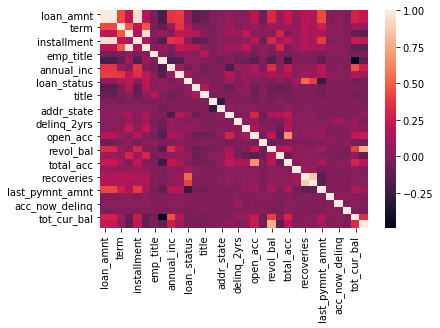

In [785]:
import seaborn as sns
sns.heatmap(df.corr())


# Thank You
***
### Next Session: Logistics Regression
